<a href="https://colab.research.google.com/github/nullHawk/Statistics/blob/main/Copy_of_Probs_%26_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some info

`norm.cdf(z)`: takes z-value as input and returns the cumulative probability from the left to that point.

`norm.ppf(p)`: takes the probability as input and returns the exact z-score of that corresponding probability.


# CLT and Estimation



---



## Central Limit Theorem

When a large enough sample is taken from a population, the distribution of the sample means will be approximately normal.

Assumptions:
- samples should be random
- samples should be independent
- sample size >= 30



## Point Estimation

If we want to estimate a single value of the population parameters, then

Population mean ($μ$): Sample mean($ \bar x $)

Population standard variance ($σ$):  

## Interval Estimation

Interval Estimate for Mean



$$\bar x - z_{α/2} * stderr < μ < \bar x + z_{α/2} * stderr$$

where,
$\alpha = 1 - confidence\ level$

$z_{\alpha /2} = z\_value\ of\ probability\ \ α/2 = norm.ppf(1 - α/2)$

$stderr = \frac{σ}{\sqrt n}$

In [ ]:
import scipy.stats as stats
import numpy as np
from scipy.stats import norm

# Given data
population_mean = 4.0
sample_mean = 4.5
population_stddev = 1.2
sample_size = 100
alpha = 0.05  # Significance level (1 - alpha will give us the confidence level)

# Calculate the critical value (Z) for a two-tailed test at the given alpha level
z_critical = norm.ppf(1 - alpha / 2)

# Calculate the margin of error
margin_of_error = z_critical * (population_stddev / np.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval:", confidence_interval)

Confidence Interval: (4.264804321855194, 4.735195678144806)


#Hypothesis Testing


---



## Null & Alternate Hypothesis
H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

Read More: https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/


## Types of Errors

`Type-I error` : False-Positive

When $H_0$ is concluded to be false but is actually true.

`Type-II error`: True-Negative

When $H_0$ is concluded to be true but is actually false.

```
--------------------------------------------------------------
|          Actual          |   Positive(T)  |   Negative(F)  |
|------------------------------------------------------------|
|                 |  True  |    No error    |  Type 2 error  |
|  Predicted (H0) |--------|---------------------------------|
|                 |  False |  Type 1 error  |    No error    |
--------------------------------------------------------------

```



##Common Algorithm
- Set up Null & Alternate Hypothesis
- Choose the distribution
    - Several Proportions : $\chi^2$ Distribution (chi-square test)
    - $n<30$ : T Distribution (t-test)
    - $n>=30$ : Gaussian/Normal Distribution (z-test)
- Select the type of test as per $H_1$
    - != : two tailed test
    - \> : right tailed test
    - <  : left tailed test
- Compute the test statistic and p-value
- Compare the p-value with significance level $(\alpha)$ and accept/reject the $H_0$

##Test for Means

### One Mean Test
Test where only one mean value is involved.

$H_0$: $μ$ = $μ_0$ or $μ$ <= $μ_0$ or $μ$ >= $μ_0$

$H_1$: $μ$ != $μ_0$ or $μ$ > $μ_0$ or $μ$ < $μ_0$





#### Test statistic: (Gaussian/Normal Distribution)
$$Z = \frac{\bar x - μ_0}{σ/\sqrt{n}}$$

Manual Code

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
sample_mean = 64.5
h0_mean = 65
std = 2.5
sample_size = 20

z = (sample_mean - h0_mean)/(std/np.sqrt(sample_size))

# for right tailed test
# p_val = 1 - norm.cdf(z)

# for left tailed test
p_val = norm.cdf(z)

# for two tailed test
# p_val = (2*norm.cdf(z) if z<0 else 2*(1 - norm.cdf(z)))

z, p_val

(-0.8944271909999159, 0.18554668476134878)

In [ ]:
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Using Modules

In [ ]:
from statsmodels.stats import weightstats as tests

sample_data = []
h0_mean = 1800

# alternative
# two-sided: two tailed test
# larger: right tailed test
# smaller: left tailed test
z_score, pval = tests.ztest(x1 = sample_data, value = h0_mean, alternative = 'two-sided')
z_score, pval

In [ ]:
alpha = 0.05

if pval < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

####Test statistic: (T Distribution)

Using Modules

In [ ]:
from scipy.stats import ttest_1samp

data =  [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]
h0_mean = 190

# h0: u<=190
# ha: u>190

# alternative
# two-sided: two tailed test
# less: left tailed test
# greater: right tailed test
t_score, p_val = ttest_1samp(data, h0_mean, alternative='greater')
t_score, p_val

(1.3689029903414232, 0.08898891556150607)

In [ ]:
# alpha 00.01 is very rare
alpha = 0.01

if p_val < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

### Two Mean Test
Test where two mean values are involved.

$H_0$: $μ_1 - μ_2$ = $μ_0$ or $μ_1 - μ_2$ <= $μ_0$ or $μ_1 - μ_2$ >= $μ_0$

$H_1$: $μ_1 - μ_2$ != $μ_0$ or $μ_1 - μ_2$ > $μ_0$ or $μ_1 - μ_2$ < $μ_0$

#### Test statistic: (Gaussian/Normal Distribution)
$$Z = \frac{\bar x_1 - \bar x_2 - μ_0}{\sqrt{σ_1^2/n_1 + σ_2^2/n_2}}$$

Manual Code

In [ ]:
sample_mean_1 = 2.87
sample_size_1 = 150
sample_std_1 = 1.08

sample_mean_2 = 2.56
sample_size_2 = 200
sample_std_2 = 1.28

# H0 : mean1 - mean2 = 0
# H1 : mean1 - mean2 > 0
h0_mean_diff = 0

z = (sample_mean_1 - sample_mean_2 - h0_mean_diff)/ np.sqrt( (sample_std_1**2)/sample_size_1 + (sample_std_2**2)/sample_size_2 )

# for right tailed test
p_val = 1 - norm.cdf(z)

# for left tailed test
# p_val = norm.cdf(z)

# for two tailed test
# p_val = (2*norm.cdf(z) if z<0 else 2*(1 - norm.cdf(z)))

z, p_val

(2.453219634102559, 0.007079193063952549)

Using Modules

In [ ]:
from statsmodels.stats import weightstats as tests

sample_data1 = []
sample_data2 = []
h0_mean_diff = 0

# alternative
# two sided: two tailed test
# larger: right tailed test
# smaller: left tailed test
z_score, pval = tests.ztest(x1 = sample_data1, x2 = sample_data2, value = h0_mean_diff, alternative = 'two-sided')
z_score, pval

#### Test statistic: (T Distribution) (Independent)

Using Modules

In [ ]:
from scipy.stats import ttest_ind

sample_data1 = []
sample_data2 = []
h0_mean_diff = 0

# alternative
# two-sided: two tailed test
# less: left tailed test
# greater: right tailed test
t_score, p_value = ttest_ind(sample_data1, sample_data2, alternative='two-sided')
t_score, p_value

In [ ]:
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

#### Test statistic: (T Distribution) (Dependent)
used for before-after cases, when both of our sample is from the same population. used to analyse the effect of something in the same population.

Using Modules

In [ ]:
from scipy.stats import ttest_rel

sample_data1 = []
sample_data2 = []
h0_mean_diff = 0

# alternative
# two-sided: two tailed test
# less: left tailed test
# greater: right tailed test
t_score, p_value = ttest_rel(sample_data1, sample_data2, alternative='two-sided')
t_score, p_value

In [ ]:
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

## Test for Proportions

### One Proportion Test
Test where one proportion value is involved.

$H_0$: $p$ = $p_0$ or $p$ <= $p_0$ or $p$ >= $p_0$

$H_1$: $p$ != $p_0$ or $p$ > $p_0$ or $p$ < $p_0$

#### Test statistic: (Gaussian/Normal Distribution)

$$Z = \frac{\hat p - p_0}{\sqrt{\frac{\hat p (1 - \hat p)}{n}}}$$

Manual Code

In [ ]:
import numpy as np
from scipy.stats import norm

sample_prop = 20
sample_size = 50
h0_prop = 0.5

p_hat = sample_prop / sample_size

z = (p_hat - h0_prop) / np.sqrt( (p_hat*(1 - p_hat))/sample_size )

# for right tailed test
# p_val = 1 - norm.cdf(z)

# for left tailed test
# p_val = norm.cdf(z)

# for two tailed test
p_val = (2*norm.cdf(z) if z<0 else 2*(1 - norm.cdf(z)))

z, p_val

(-1.443375672974064, 0.07445733658938289)

In [ ]:
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Using Modules

In [ ]:
from statsmodels.stats import proportion as prop_tests

sample_prop = 50
sample_size = 100
h0_prop = 0.5

# alternative
# two-sided: two tailed test
# larger: right tailed test
# smaller: left tailed test
z_score, pval = prop_tests.proportions_ztest(count = sample_prop, nobs = sample_size, value = h0_prop, alternative = 'two-sided')
z_score, pval

In [ ]:
alpha = 0.05

if pval < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

### Two Proportion Test

Test where two proportion values are involved.

$H_0$: $p_1 - p_2$ = $p_0$ or $p_1 - p_2$ <= $p_0$ or $p_1 - p_2$ >= $p_0$

$H_1$: $p_1 - p_2$ != $p_0$ or $p_1 - p_2$ > $p_0$ or $p_1 - p_2$ < $p_0$

#### Test statistic: (Gaussian/Normal Distribution)

$$Z = \frac{\hat p_1 - \hat p_2 - p_0}{\sqrt{\bar p (1 - \bar p) (1/n_1 + 1/n_2)}}$$

where,

$$ \bar p = \frac{n_1 \hat p_1 + n_2 \hat p_2}{n_1 + n_2}$$

Using Modules

In [ ]:
from statsmodels.stats import proportion as prop_tests

sample_prop1 = 50
sample_size1 = 100
sample_prop1 = 70
sample_size1 = 130

h0_prop_diff = 0

# alternative
# two-sided: two tailed test
# larger: right tailed test
# smaller: left tailed test
z_score, pval = prop_tests.proportions_ztest(count = [sample_prop1, sample_prop2], nobs = [sample_size1, sample_size2], value = h0_prop_diff, alternative = 'two-sided')
z_score, pval

In [ ]:
alpha = 0.05

if pval < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

### Several Proportion Test

Test where two proportion values are involved.

#### Test statistic: (Chi-square Distribution) (Goodness of Fit)

$$χ^2 = \frac{Σ(Observed_{i} - Expected_{i})^2}{(Expected)}$$

Manual Code

In [ ]:
from scipy.stats import chi2

observed = [22, 28]
sum_observed = sum(observed)
# here i am assuming equal possible proportions for all. if the proportions are given different in question, do them accordingly
expected = [sum_observed/len(observed)] * len(observed)

chi_sq_score = sum([(i[0]-i[1])**2/i[1] for i in zip(observed, expected)])
p_val = 1 - chi2.cdf(chi_sq_score, df=len(observed)-1)
chi_sq_score, p_val

(0.72, 0.3961439091520741)

In [ ]:
alpha = 0.05

if pval < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Using Modules

In [ ]:
from scipy.stats import chisquare

observed = [22, 28]
sum_observed = sum(observed)
# here i am assuming equal possible proportions for all. if the proportions are given different in question, do them accordingly
expected = [sum_observed/len(observed)] * len(observed)

chi_stat, p_value = chisquare(f_obs = observed, f_exp = expected)
chi_stat, p_value

(0.72, 0.3961439091520741)

In [ ]:
alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

#### Test statistic: (Chi-square Distribution) (Test for Independence)

Using Modules

In [ ]:
from scipy.stats import chi2_contingency

observed = [[527, 72],
            [206, 102]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
chi_stat, p_value

(57.04098674049609, 4.268230756875865e-14)

In [ ]:
alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


## Analysis of Variance (ANOVA)

ANOVA is used when there are more than two categories for which we need to analyse numeric values (several means)

ANOVA folows the f-distribution

Assumptions of ANNOVA:
- Data should be Gaussian
- Data is independent of each other
- Equal Variances in different group

Using Modules

In [ ]:
import numpy as np
import pandas as pd

# keep your data here
data = {"categorical" : [ "x",  "y",  "z",  "y",  "z",  "y",  "y"],
        "numerical"   : [1203, 1238, 1839, 2739, 3903, 3740, 8303]}

df = pd.DataFrame(data)
df

,categorical,numerical
0,x,1203
1,y,1238
2,z,1839
3,y,2739
4,z,3903
5,y,3740
6,y,8303


In [ ]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df[df["categorical"] == "x"]["numerical"], df[df["categorical"] == "y"]["numerical"], df[df["categorical"] == "z"]["numerical"])
f_stat, p_val

(0.4510864567885584, 0.6657983747431078)

In [ ]:
alpha = 0.05

if p_val < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


## Kruskal - Walis Test



It is performed when the assumptions for ANNOVA are not met. It is a test based on medians. It follows h-distribution.

Many a times the difference between ANNOVA p-value and Kruskal-Walis p-value coincides.

In [ ]:
import numpy as np
import pandas as pd

# keep your data here
data = {"categorical" : [ "x",  "y",  "z",  "y",  "z",  "y",  "y"],
        "numerical"   : [1203, 1238, 1839, 2739, 3903, 3740, 8303]}

df = pd.DataFrame(data)
df

In [ ]:
from scipy.stats import kruskal

stat, p_val = kruskal(df[df["categorical"] == "x"]["numerical"], df[df["categorical"] == "y"]["numerical"], df[df["categorical"] == "z"]["numerical"])
stat, p_val

## Test for Normality

### Quantile-Quantile (QQ) Plots

QQ-Plots are a graphical way to see that if a data is normal or not. The more it is aligned to the diagonal line, the more normal it is.





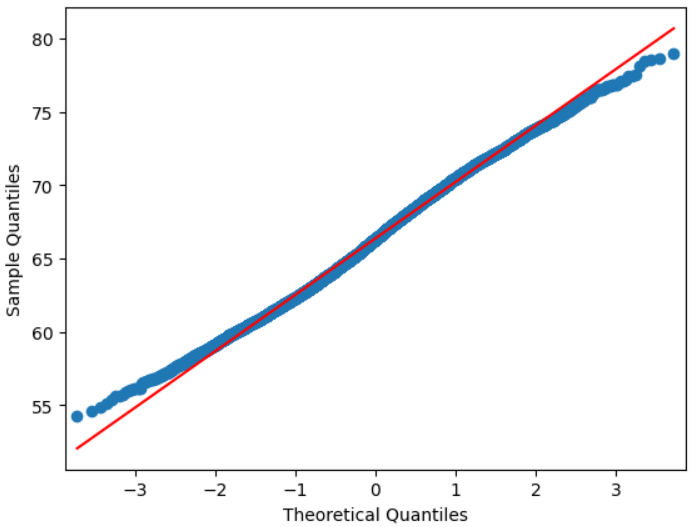

This plot shows that the sample data is normally distributed.

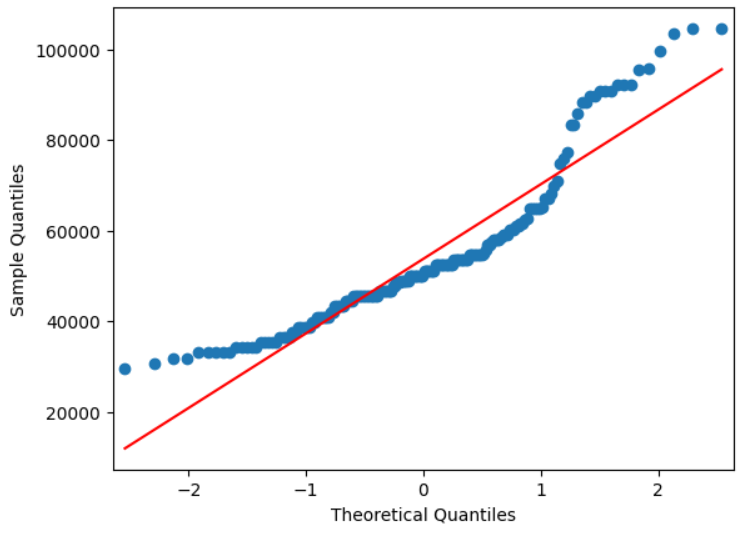

This graph shows that the data is not normal for the taken samples.

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

data = []
qqplot(data)
plt.show()

### Shapiro-Wilk Test



Hypothesis test to check if a data is normal or not.

$H_0$: Data is not gaussian/normal

$H_1$: Data is gaussian/normal

In [ ]:
from scipy.stats import shapiro

data = []
test_stat, p_value = shapiro(data)
test_stat, p_value

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is Gaussian")
else:
    print("Fail to reject H0")

# Correlation
---

For checking relation between
- Numerical v/s Categorical (2 categories)
    - 2 sample z-test/t-test
- Numerical v/s Categorical (more than 2 categories)
    - ANNOVA/Kruskal-Walis
- Categorical v/s Categorical
    - Chi-square test
- Numerical v/s Numerical
    - Correlation

### Covariance

Used to understand whether two numerical variables are related or not.

$$cov(x, y) = \frac{Σ (x_i - \bar x) (y_i - \bar y)}{n-1}$$

In [ ]:
import numpy as np
import pandas as pd

# always takes the data in transpose form (in the shape (2, n))
# outputs a 2x2 contigency table
#             num 1              num 2
# num 1     var(num 1)     cov(num 1, num 2)
# num 2 cov(num 1, num 2)      var(num 1)

np.cov(df["numerical1", "numerical2"].T)

### Pearson Correlation Coefficient



Used to determine how strongly the variables are correlated.
Ranges from -1 to 1, -1 being strongly negatively correlated and 1 being strongly positively correlated. Only works for linear relation.


$$ ρ(x,y) = \frac{cov(x, y)}{\sigma_x \sigma_y}$$

or,

$$ ρ(x,y) = \frac{Σ (x_i - \bar x) (y_i - \bar y)}{\sqrt {\Sigma (x_i - \bar x)^2 (y_i - \bar y)^2} }$$

In [ ]:
import numpy as np
import pandas as pd

# always takes the data in transpose form (in the shape (2, n))
# outputs a 2x2 table
#             num 1              num 2
# num 1         1          rho(num 1, num 2)
# num 2 rho(num 1, num 2)          1

np.corrcoef(df["numerical1", "numerical2"].T)

In [ ]:
from scipy.stats import pearsonr
# H0: No correlation
# Ha: There is correlation
pearsonr(df["numerical1"], df["numerical2"])

In [ ]:
# default method is pearson
df["numerical1", "numerical2"].corr()

### Spearman Rank Correlation Coefiicient



Correlation for non-linear relations.
We sort the values and assign ranks to the data.
Then we find the pearson correlation coefficient for ranks of x and y.
If the relation between the two numerical variables are monotonically increasing/decreasing, then we would get a high +ve or -ve value.

For linear relations, SPCC is almost equal to PCC.

In [ ]:
df["numerical1", "numerical2"].corr(method="spearman")

### Heatmap



Representation of correlation values in a color-coded way.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot= True)